In [159]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
#from skopt import BayesSearchCV
#from skopt.space import Real, Categorical, Integer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from tpot import TPOTClassifier
from tpot import TPOTRegressor

# EXECUTE FIRST
# computational imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, RandomizedSearchCV
import xgboost as xgb
from scipy.stats import uniform, randint
from tpot import TPOTRegressor
from pprint import pprint

# plotting imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

# display imports
from IPython.display import display, IFrame
from IPython.core.display import HTML

# import warnings
import warnings

/Users/justinkahler/opt/anaconda3/lib/python3.9/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [93]:
top_ten_data

,Type,ABV,IBU
0,IPA - New England / Hazy,6.3,15.0
2,Sour - Fruited,5.3,5.0
3,IPA - New England / Hazy,6.7,10.0
6,Pale Ale - Milkshake,5.9,10.0
8,IPA - New England / Hazy,6.9,10.0
...,...,...,...
275,Sour - Fruited,5.0,0.0
276,Hard Seltzer,5.0,0.0
277,Stout - Imperial / Double,10.5,25.0
282,IPA - American,7.2,66.0


In [95]:
#Check it out
y

array([['IPA - New England / Hazy'],
       ['Sour - Fruited'],
       ['IPA - New England / Hazy'],
       ['Pale Ale - Milkshake'],
       ['IPA - New England / Hazy'],
       ['Sour - Fruited'],
       ['Pale Ale - Milkshake'],
       ['Pale Ale - Milkshake'],
       ['IPA - New England / Hazy'],
       ['Sour - Fruited'],
       ['IPA - American'],
       ['IPA - New England / Hazy'],
       ['IPA - American'],
       ['Porter - Other'],
       ['Sour - Fruited'],
       ['Sour - Fruited'],
       ['Sour - Fruited'],
       ['Sour - Fruited'],
       ['Stout - Imperial / Double'],
       ['Pale Ale - Milkshake'],
       ['Sour - Fruited'],
       ['Stout - Imperial / Double'],
       ['IPA - New England / Hazy'],
       ['Sour - Fruited'],
       ['Sour - Fruited'],
       ['Sour - Fruited'],
       ['IPA - American'],
       ['Sour - Fruited'],
       ['Sour - Fruited Berliner Weisse'],
       ['IPA - New England / Hazy'],
       ['Sour - Fruited'],
       ['Pale Ale - Milkshake']

In [96]:
#Check it out
x

array([[-0.14844516, -0.08867756],
       [-0.60874025, -0.58808906],
       [ 0.03567287, -0.33838331],
       [-0.3325632 , -0.33838331],
       [ 0.12773189, -0.33838331],
       [-0.70079927, -0.83779482],
       [-0.3325632 , -0.58808906],
       [-0.3325632 , -0.43826561],
       [ 0.08170238, -0.83779482],
       [-0.79285828, -0.83779482],
       [ 0.63405648,  2.85785034],
       [-0.10241566, -0.08867756],
       [-0.01035664,  2.10873308],
       [-0.51668123, -0.58808906],
       [-0.70079927, -0.83779482],
       [-0.79285828, -0.83779482],
       [-0.79285828, -0.83779482],
       [-0.74682877, -0.83779482],
       [ 1.18641058,  1.15985121],
       [-0.51668123, -0.58808906],
       [-0.74682877, -0.83779482],
       [ 1.18641058,  1.05996891],
       [ 0.12773189, -0.33838331],
       [-0.65476976, -0.83779482],
       [-0.60874025, -0.83779482],
       [-0.74682877, -0.73791252],
       [-0.14844516,  1.40955697],
       [-0.74682877, -0.73791252],
       [-0.97697632,

In [174]:
#Step 3: PCA Projection to 2D

#The original data has four columns (sepal length, sepal width, petal length and petal width). 
#In this section, the code projects the original data, which is four-dimensional, into two dimensions. 
#After dimensionality reduction, there usually isn’t a particular meaning 
#assigned to each principal component. 
#The new components are just the two main dimensions of variation.


In [97]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [190]:
#Concatenating DataFrame along axis = 1. finalDf is the final DataFrame before plotting the data.
finalDf = pd.concat([principalDf, df[['Type']]], axis = 1)
result = finalDf.head(10)
print("First 10 rows of the DataFrame:")
print(result)



First 10 rows of the DataFrame:
   principal component 1  principal component 2  \
0              -0.167671               0.042262   
1              -0.846286               0.014603   
2              -0.214049              -0.264498   
3              -0.474431              -0.004115   
4              -0.148953              -0.329593   
5              -1.087950              -0.096870   
6              -0.650999              -0.180684   
7              -0.545058              -0.074743   
8              -0.534638              -0.650183   
9              -1.153046              -0.031775   

                                         Type  
0                    IPA - New England / Hazy  
1            Wheat Beer - American Pale Wheat  
2                              Sour - Fruited  
3                    IPA - New England / Hazy  
4                       Lager - Munich Dunkel  
5                              Lager - Vienna  
6                        Pale Ale - Milkshake  
7  IPA - Imperial / Do

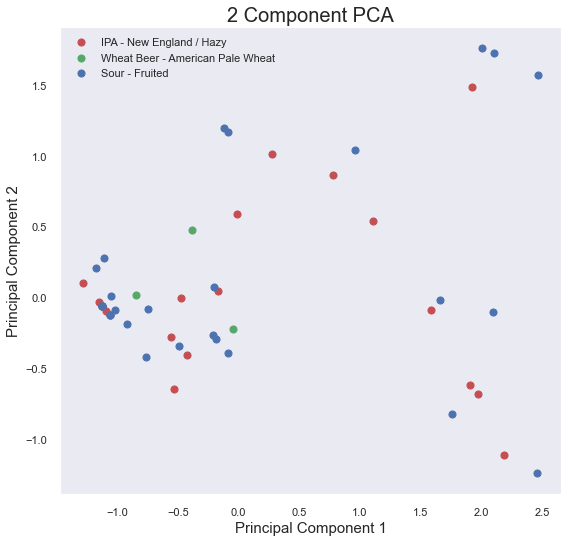

In [185]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

targets = ['IPA - New England / Hazy', 'Wheat Beer - American Pale Wheat', 'Sour - Fruited','Lager - Munich Dunkel',
           'Lager - Vienna','Pale Ale - Milkshake','IPA - Imperial / Double New England / Hazy','IPA - Imperial / Doubl']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Type'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:



#K-Means CLustering





In [141]:
ltb1 = pd.read_csv('/Users/justinkahler/LTB_Clean.csv')


In [142]:
ltb2 = ltb1[ltb1['Number_of_Ratings'] > 10] 


In [143]:
#ltb3 = ltb2[["Type", "ABV","IBU"]]
ltb3 = ltb2[["ABV","IBU"]]


In [144]:
# convert just columns ABV, IBU, Average_Rating, Number_of_ratings

# using dictionary to convert specific columns
convert_dict = {#'Type': str,
                'ABV': float,
                'IBU': float,}
 
ltb4 = ltb3.astype(convert_dict)
print(ltb4.dtypes)


ABV    float64
IBU    float64
dtype: object


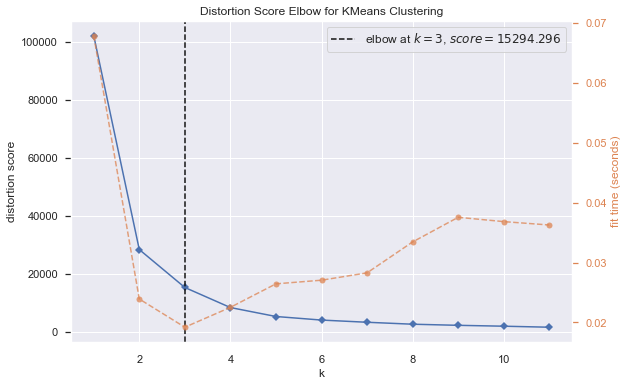

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [145]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(ltb4)
visualizer.show()
#In the  figure, the optimal number of clusters (k) is plotted against the 
#distortion (total of within-cluster sum of squares for a given number of k). 
#The optimal number of k is a point where there is a bend in the curve (elbow or knee). 
#Based on the elbow method, the optimal number of clusters (k) is 3

In [146]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0).fit(ltb4)


In [147]:
kmeans.labels_  # same as kmeans.predict(df)

array([0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       2, 1, 0, 0, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0,
       2, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 1, 0, 2, 0, 0, 0,
       0, 1, 2, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 1, 2, 1, 0, 0, 2,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 2,
       2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 2, 0, 0,
       0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 1, 2, 2, 2,
       0, 0, 0, 2, 1, 2, 0, 2, 0, 1, 1, 0, 0, 0, 0, 1, 2, 2, 2, 2, 1, 1,
       0, 0, 2, 0, 2, 2, 0, 2, 1, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0,
       0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 0, 0, 2, 2, 2, 0, 0, 1, 2],
      dtype=int32)

In [148]:
kmeans.inertia_

15294.296416412682

In [149]:
kmeans.n_iter_

3

In [150]:
kmeans.cluster_centers_

array([[ 5.69440994,  6.16149068],
       [ 7.95837209, 53.97674419],
       [ 7.51875   , 28.775     ]])

In [151]:
#Get each cluster size,

from collections import Counter
Counter(kmeans.labels_)
# output
Counter({2: 50, 0: 50, 3: 50, 1: 50})
#k-means clustering has four clusters of size 50, 50, 50 and 50.

Counter({2: 50, 0: 50, 3: 50, 1: 50})

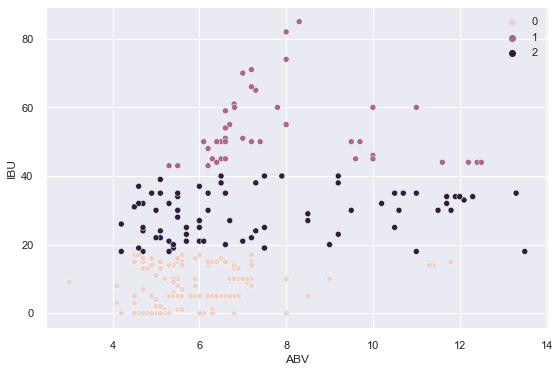

In [156]:
#Visualization of k-means clusteringPermalink

#Visualize the cluster as scatter plot and color the clusters using predicted class labels,

import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=ltb4, x="ABV", y="IBU", hue=kmeans.labels_)
#sns.scatterplot(data=df, x="var1", y="var2", hue=kmeans.labels_)

plt.show()


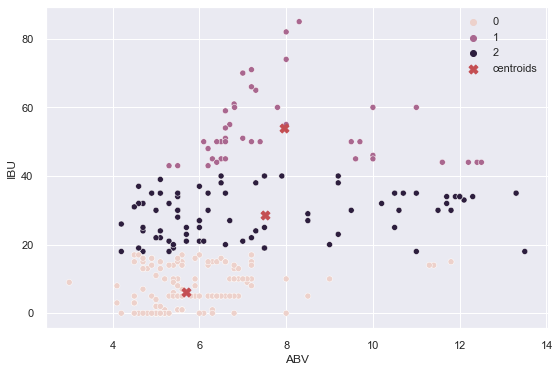

In [153]:
#Plot k-means clustering plot with centroids marked
sns.scatterplot(data=ltb4, x="ABV", y="IBU", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()